# Adult Data Set - 1994 Census Data

In [1]:
# Source - https://archive.ics.uci.edu/ml/datasets/adult

# Attribute Information:

# >50K, <=50K. 
# age: continuous. 
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
# fnlwgt: continuous. 
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
# education-num: continuous. 
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
# sex: Female, Male. 
# capital-gain: continuous. 
# capital-loss: continuous. 
# hours-per-week: continuous. 
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [2]:

# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline 

# File to Load (Remember to Change These)
file_to_load = "adult.csv"

# Read Adult File and store into Pandas data frame
adult_data = pd.read_csv(file_to_load)
adult_data.head(5)


,Age,Workclass,fnlwgt,Education,Education_Nbr,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,native-county,Attrtibutes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data cleansing

In [3]:
# check the dtypes

adult_data.dtypes

# check for null values

adult_data.isnull().sum()

# Data cleaning

#for column in df:
    #print(column,df[column].unique())
    
# remove data where occupation,native-county is ' ?'
# remove data where Workclass is Without-pay

df = adult_data.loc[adult_data['Occupation'] != ' ?'] 

df = df.loc[df['Workclass'] != ' Without-pay'] 

df = df.loc[df['native-county'] != ' ?']

df['Marital_Status'].unique()
df['Marital_Status'].unique()

# remove columns that are insignificant for our analysis like fnlwgt, Capital-gain, Capital-loss, Education_Nbr
    
del df['fnlwgt']

del df['Capital-gain']

del df['Capital-loss']

del df['Education_Nbr']

# Replace Married-civ-spouse, Married-AF-spouse as Married
# Repalce Married-spouse-absent as Seperated

df['Marital_Status'] = df['Marital_Status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], ' Married')

df['Marital_Status'] = df['Marital_Status'].replace([' Married-spouse-absent'], ' Separated')

df['Marital_Status'] = df['Marital_Status'].replace([' Divorced',' Widowed'], ' Separated')


# Replace ' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' Preschool',' 12th', ' 1st-4th' as ' Below-HS'
# Replace ' Assoc-acdm', ' Assoc-voc' as Twoyear-Degree

df['Education'] = df['Education'].replace([' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' Preschool',' 12th', ' 1st-4th'], ' Below-HS')

df['Education'] = df['Education'].replace([' Assoc-acdm', ' Assoc-voc'], ' Twoyear-Degree')

# Replace ' State-gov',' Federal-gov',' Local-gov' as Public sector
# Replace ' Self-emp-not-inc',' Self-emp-inc' as Self-emp

df['Workclass'] = df['Workclass'].replace([' State-gov',' Federal-gov',' Local-gov'], ' Public')

df['Workclass'] = df['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'], ' Self-emp')

df.isnull().sum()
df.head(5)

,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours per week,native-county,Attrtibutes
0,39,Public,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,Below-HS,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Education vs Income

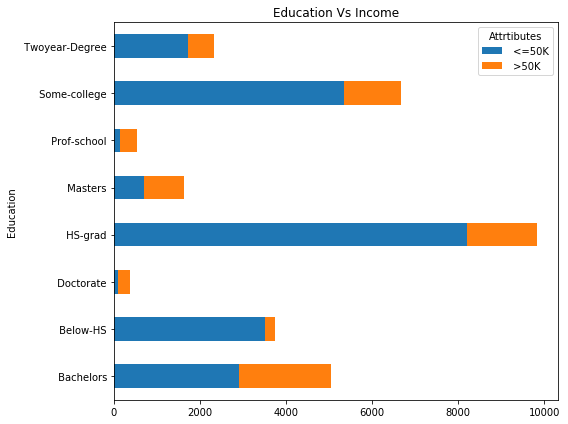

In [4]:

df_education = df.groupby(['Education','Attrtibutes'])

summary_education = pd.DataFrame({"Education":df_education['Education'].count(),
                                  "Salary":df_education['Attrtibutes'].count()})

del summary_education['Education']

summary_education = summary_education.reset_index(level=[0,1])

data_education = summary_education.set_index(['Education', 'Attrtibutes']).Salary


ax = data_education.unstack().plot(kind='barh', stacked=True, figsize=(8, 6))

ax.set_title('Education Vs Income')

plt.tight_layout()

plt.savefig("Plot1.png")

plt.show()


# WorkClass vs Income

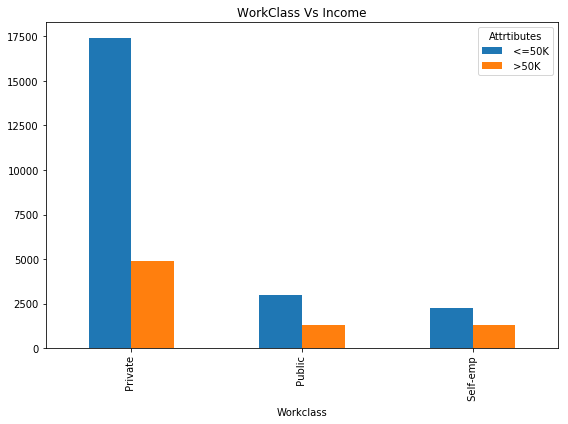

In [5]:
df_wc = df.groupby(['Workclass','Attrtibutes'])

summary_wc = pd.DataFrame({"Workclass":df_wc['Workclass'].count(),"Salary":df_wc['Attrtibutes'].count()})

del summary_wc['Workclass']

summary_wc = summary_wc.reset_index(level=[0,1])

data_wc = summary_wc.set_index(['Workclass', 'Attrtibutes']).Salary


ax = data_wc.unstack().plot(kind='bar', figsize=(8, 6))

ax.set_title('WorkClass Vs Income')

plt.tight_layout()

plt.savefig("Plot2.png")

plt.show()


# MaritalStatus and Education subclass of high Income group

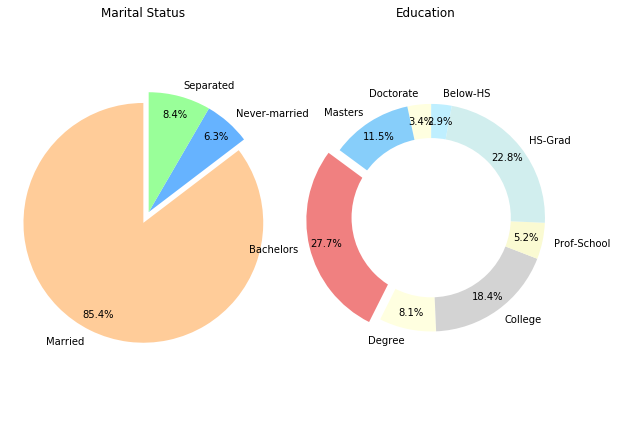

In [6]:


df_filtered = df.loc[df['Attrtibutes']  != ' <=50K']

# finding marital status of high income group

df_ms = df_filtered.groupby(['Marital_Status'])

Total_count = df_filtered["Attrtibutes"].count()

percent = (df_ms["Attrtibutes"].count()/Total_count)*100


# finding Education backgroup within the high income marital status group

df_filtered1 = df_filtered.loc[df_filtered['Marital_Status'] == ' Married']

df_ms_ed = df_filtered1.groupby(['Education'])

Total_count1 = df_filtered1['Education'].count()

percent1 = (df_ms_ed["Education"].count()/Total_count1)*100

# Plot

labels = ["Married", "Never-married", "Separated"]

sizes = [percent.loc[' Married'], percent.loc[' Never-married'], percent.loc[' Separated']]

explode = (0.1, 0, 0)

colors = ['#ffcc99','#66b3ff','#99ff99']


labels1 = ["Doctorate", "Masters", "Bachelors","Degree", "College", "Prof-School","HS-Grad","Below-HS"]

sizes1 = [percent1.loc[' Doctorate'], percent1.loc[' Masters'], percent1.loc[' Bachelors'],
         percent1.loc[' Twoyear-Degree'], percent1.loc[' Some-college'], percent1.loc[' Prof-school'],
         percent1.loc[' HS-grad'], percent1.loc[' Below-HS']]


explode1 = (0, 0, 0.1, 0, 0, 0, 0, 0)

colors1 = ['#FFFFE0','#87CEFA','#F08080','#FFFFE0','#D3D3D3','#FAFAD2','#D1EEEE','#BFEFFF']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

# fig1, ax1 = plt.subplots()

pie_1 = axes[0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Define this plot title

axes[0].set_title('Marital Status')

# Make both axes equal, so that the chart is round
axes[0].axis('equal')


pie_2 = axes[1].pie(sizes1, colors = colors1, labels=labels1, autopct='%1.1f%%', startangle=90, 
        pctdistance=0.85, explode=explode1)

axes[1].set_title('Education')

plt.axis('equal')

# draw circle

centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.gcf().gca().add_artist(centre_circle)

# # Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.subplots_adjust()

fig.tight_layout()

plt.savefig("Plot3.png")

plt.show()



# Gender vs Income

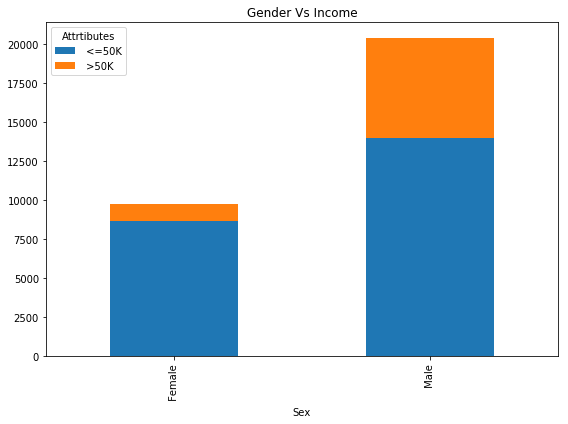

In [7]:
df_gender = df.groupby(['Sex','Attrtibutes'])
summary_gender = pd.DataFrame({"Sex":df_gender['Sex'].count(),"Salary":df_gender['Attrtibutes'].count()})

del summary_gender['Sex']

summary_gender = summary_gender.reset_index(level=[0,1])

gender_data = summary_gender.set_index(['Sex', 'Attrtibutes']).Salary


ax = gender_data.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

ax.set_title('Gender Vs Income')

plt.tight_layout()

plt.savefig("Plot4.png")

plt.show()



# Occupation vs Gender

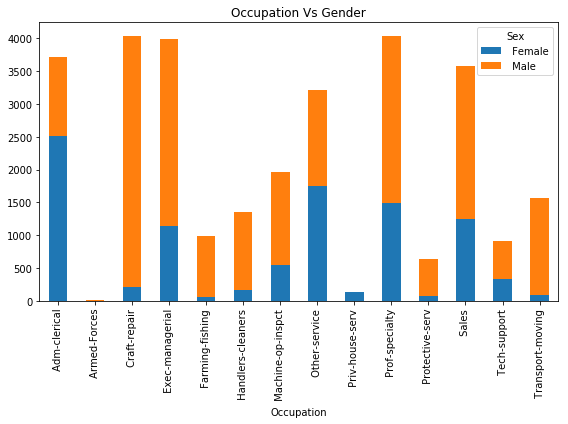

In [8]:
df_occupation = df.groupby(['Occupation','Sex'])
summary_occupation = pd.DataFrame({"Occupation":df_occupation['Occupation'].count(),
                                   "Gender_Ct":df_occupation['Sex'].count()})

del summary_occupation['Occupation']

summary_occupation = summary_occupation.reset_index(level=[0,1])

data_occupation = summary_occupation.set_index(['Occupation', 'Sex']).Gender_Ct

ax = data_occupation.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

ax.set_title('Occupation Vs Gender')

plt.tight_layout()

plt.savefig("Plot5.png")

plt.show()



# Education vs Gender

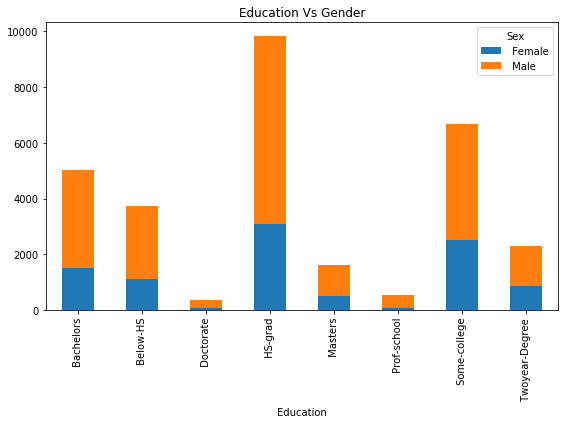

In [9]:
df_ed = df.groupby(['Education','Sex'])
summary_ed = pd.DataFrame({"Education":df_ed['Education'].count(),"Gender_Ct":df_ed['Sex'].count()})

del summary_ed['Education']


summary_ed = summary_ed.reset_index(level=[0,1])

data_ed = summary_ed.set_index(['Education', 'Sex']).Gender_Ct

ax = data_ed.unstack().plot(kind='bar', stacked=True, figsize=(8, 6))

ax.set_title('Education Vs Gender')

plt.tight_layout()

plt.savefig("Plot6.png")

plt.show()

# Categorical Income of people based on marital status and hours-per-week

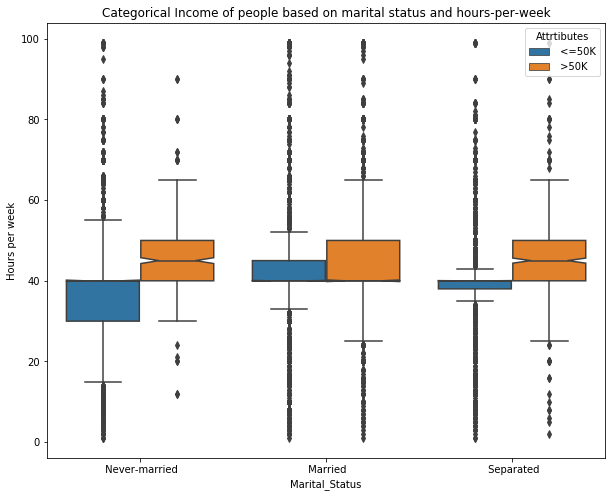

In [10]:

# Creating a box plot  
fig, ax = plt.subplots(figsize=(10, 8))  
sns.boxplot(x='Marital_Status', y='Hours per week', hue='Attrtibutes', notch=True, data=df, ax=ax)  
ax.set_title('Categorical Income of people based on marital status and hours-per-week')  

plt.savefig("Plot7.png")
plt.show() 




# Categorical plot of Income and Hours worked grouped by Gender

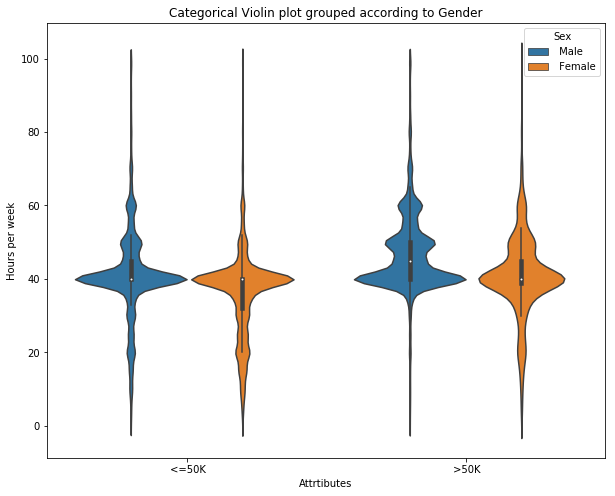

In [11]:

fig, ax = plt.subplots(figsize=(10, 8)) 
sns.violinplot(x='Attrtibutes', y='Hours per week', hue='Sex', data=df, ax=ax)  
ax.set_title('Categorical Violin plot grouped according to Gender') 
plt.savefig("Plot8.png")
plt.show()  
 